In [29]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import shutil
import time
#sns.set()

In [30]:
def get_filenames(path='.', extension=None, pattern=None, identifiers=None, include_path=False):
   
    # retrieve all filenames from the directory
    filename_list = os.listdir(path)
    # keep all filenames with the proper extension
    if extension is not None:
        filename_list = [filename for filename in filename_list if
                         filename[-len(extension):] == extension]
    # keep all filenames that match the pattern
    if pattern is not None:
        filename_list = [filename for filename in filename_list if re.search(pattern, filename)]
    # keep all filenames that match the identifiers provided
    if identifiers is not None:
        storage_list = []
        try:
            for ident in identifiers:
                storage_list.extend([filename for filename in filename_list if str(ident) in filename])
        except TypeError:
            print(identifiers, 'is not a list, tuple, or otherwise iterable')
        else:
            filename_list = storage_list
    if include_path:
        filename_list = [path + filename for filename in filename_list]
    return filename_list

def reading_in(fits_name):
    fits_image_filename = fits.open("/Users/matt/Desktop/DESI_Research/DESI_ML/New_QSO/" + str(fits_name) +"")
    hdul = fits_image_filename 
    Q_data_coadd = hdul["COADD"].data
    Q_data_spa = hdul["SPALL"].data
    Q_data = {'COADD':Q_data_coadd, 'SPALL':Q_data_spa}
    
    return Q_data

def assignment(Q_data):
    flux = Q_data['COADD'].field("flux")
    wave = Q_data['COADD'].field("loglam")
    z = Q_data['SPALL'].field("Z")
    dict_values = {'WAVELENGTH': wave, 'FLUX': flux, 'REDSHIFT':z}
    
    return dict_values

def plot(dict_values, name):
    plt.figure(figsize=(14,8))
    plt.plot(dict_values['WAVELENGTH'], dict_values['FLUX'])
    plt.xlabel("wavelength [I don't know the units]")
    plt.ylabel("Flux [$10^{-17}$ erg/$cm^2$/s/$\AA$]")
    #plt.grid()
    plt.title("" + str(name)+ "")
    
def total_func(fits_name):
    data = reading_in(fits_name)
    values = assignment(data)
    graph = plot(values, fits_name)
    
    return graph

def subplots(fits_list):
    for i in range(len(fits_list)):
        plots = total_func(fits_list[i])
        
    return plots
    

In [40]:
quasar_list = ("spec-4295-55858-0846.fits", "spec-5972-56334-0658.fits", "spec-5973-56067-0055.fits", \
             "spec-6425-56298-0678.fits", "spec-6433-56339-0048.fits")

stardata = get_filenames("/Users/matt/Desktop/DESI_Research/DESI_ML/good_stars/", extension='.fits')
cut_stardata = stardata[:5]


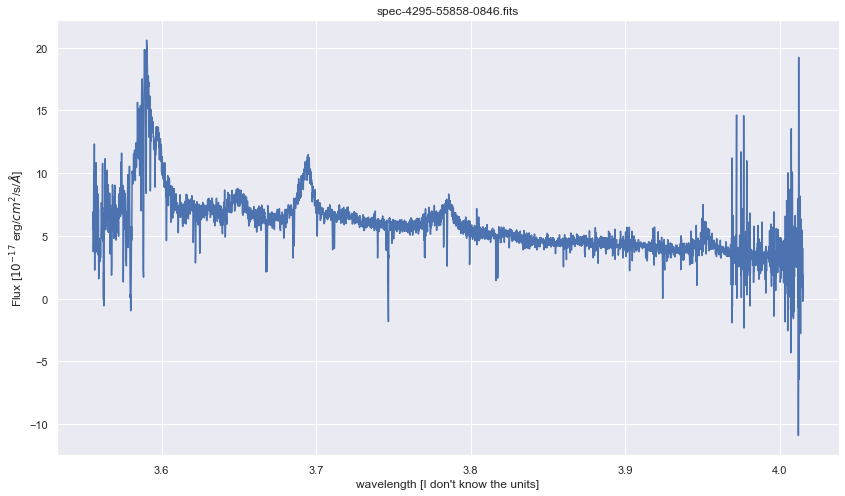

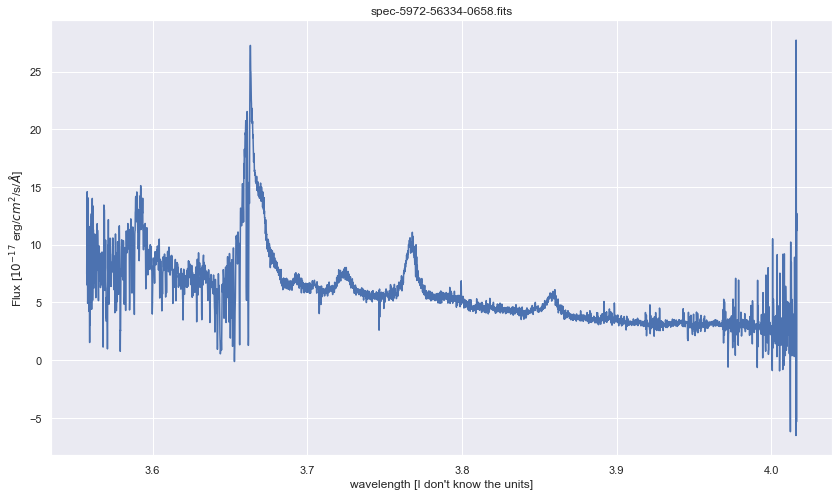

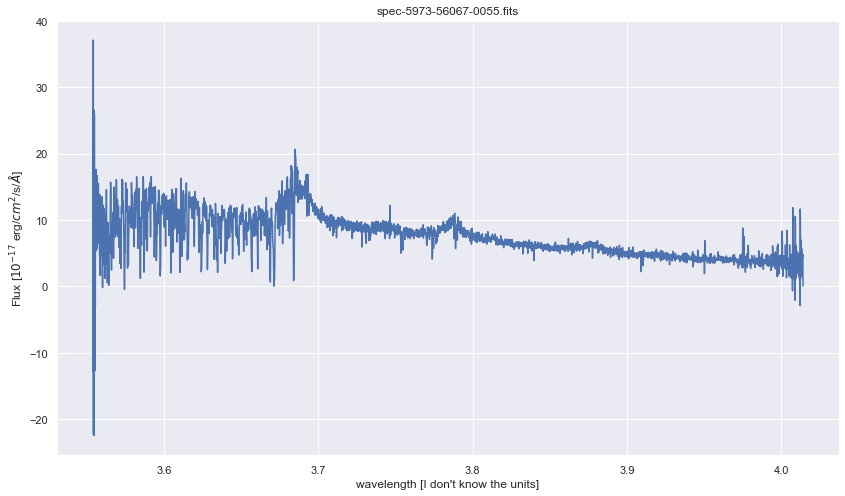

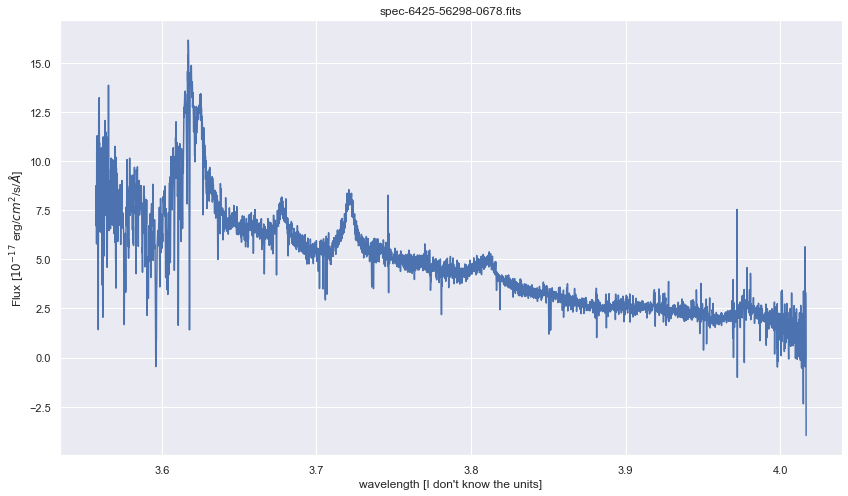

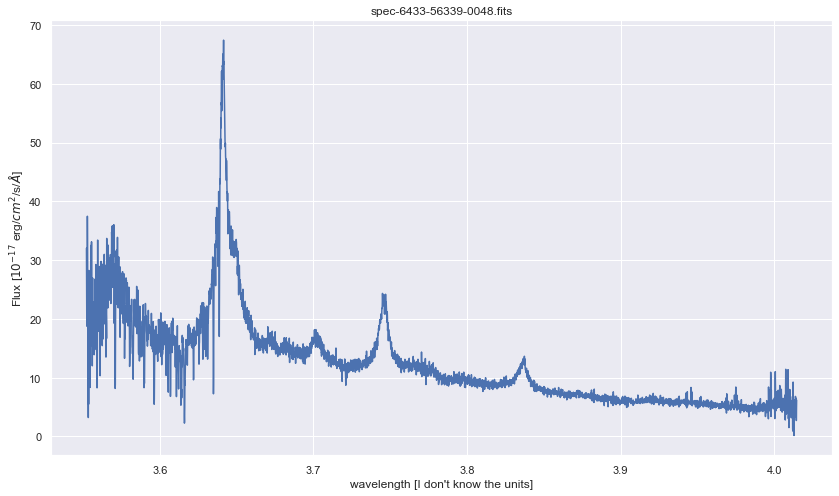

In [42]:
subplots(quasar_list)


In [44]:
def reading_in(fits_name):
    fits_image_filename = fits.open("/Users/matt/Desktop/DESI_Research/DESI_ML/good_stars/" + str(fits_name) +"")
    hdul = fits_image_filename 
    Q_data_coadd = hdul["COADD"].data
    Q_data_spa = hdul["SPALL"].data
    Q_data = {'COADD':Q_data_coadd, 'SPALL':Q_data_spa}
    
    return Q_data

def assignment(Q_data):
    flux = Q_data['COADD'].field("flux")
    wave = Q_data['COADD'].field("loglam")
    z = Q_data['SPALL'].field("Z")
    dict_values = {'WAVELENGTH': wave, 'FLUX': flux, 'REDSHIFT':z}
    
    return dict_values

def plot(dict_values, name):
    plt.figure(figsize=(14,8))
    plt.plot(dict_values['WAVELENGTH'], dict_values['FLUX'])
    plt.xlabel("wavelength [I don't know the units]")
    plt.ylabel("Flux [$10^{-17}$ erg/$cm^2$/s/$\AA$]")
    #plt.grid()
    plt.title("" + str(name)+ "")
    
def total_func(fits_name):
    data = reading_in(fits_name)
    values = assignment(data)
    graph = plot(values, fits_name)
    
    return graph

def subplots(fits_list):
    for i in range(len(fits_list)):
        plots = total_func(fits_list[i])
        
    return plots
    

In [45]:
stardata = get_filenames("/Users/matt/Desktop/DESI_Research/DESI_ML/good_stars/", extension='.fits')
cut_stardata = stardata[:10]

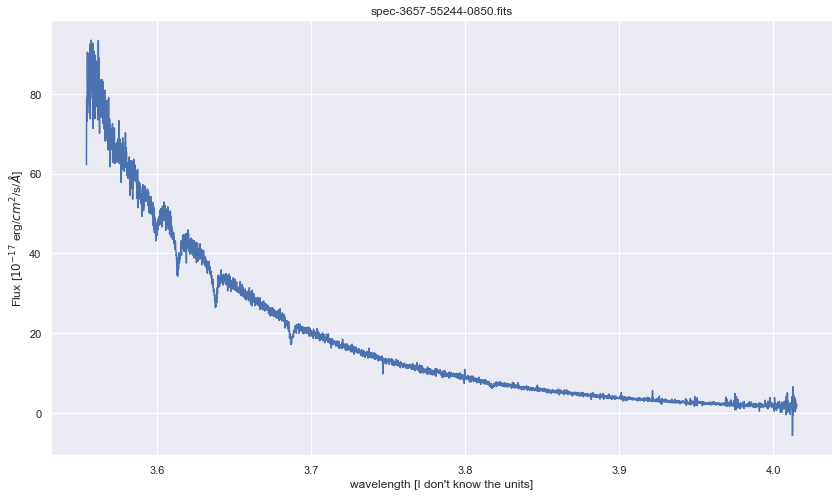

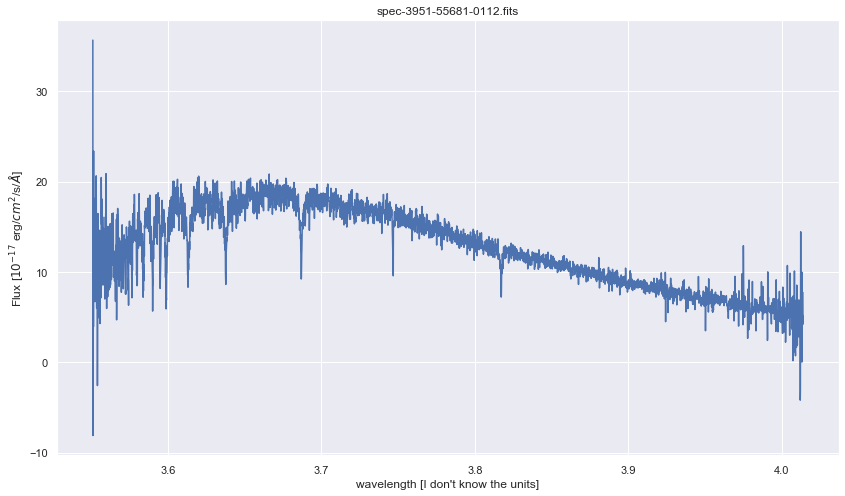

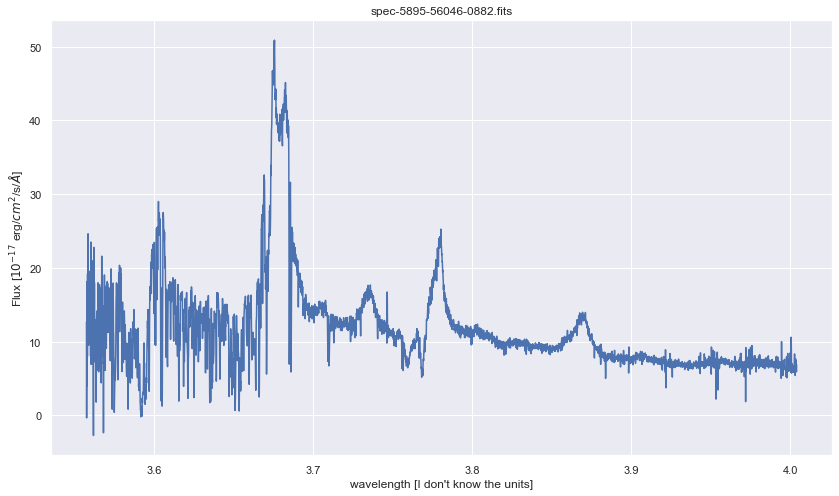

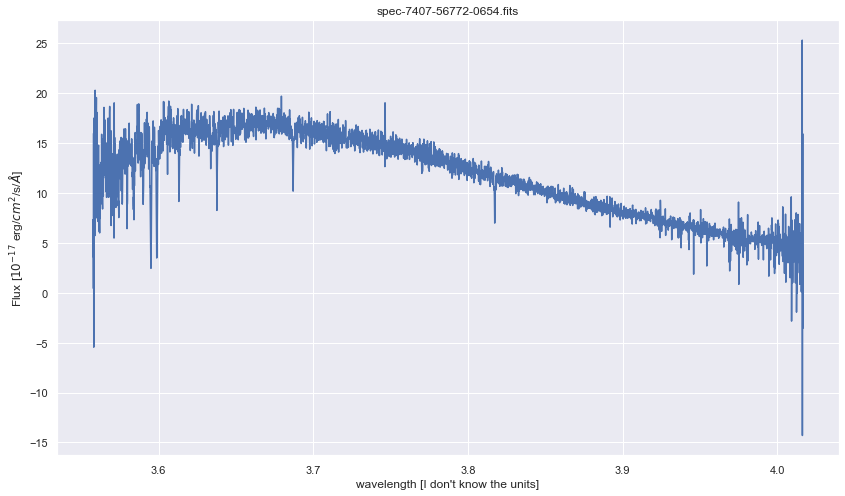

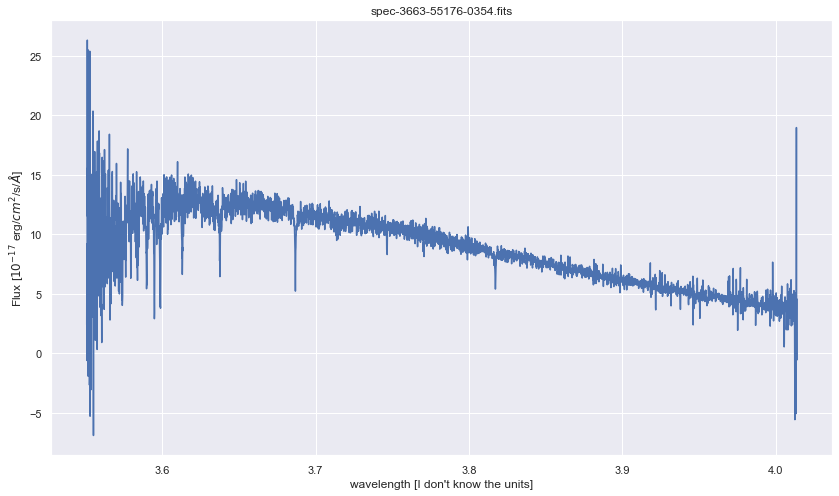

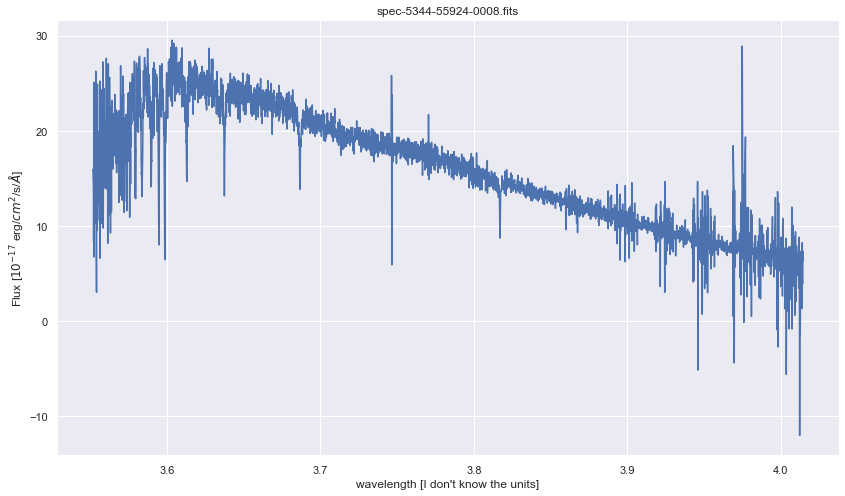

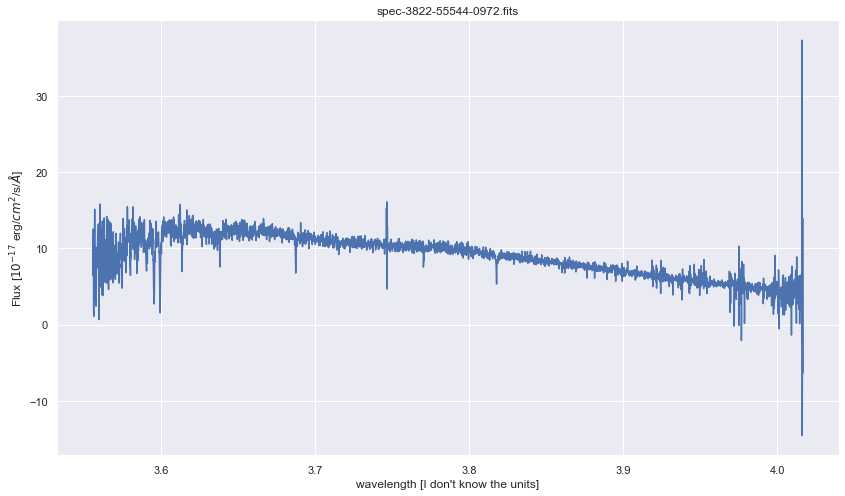

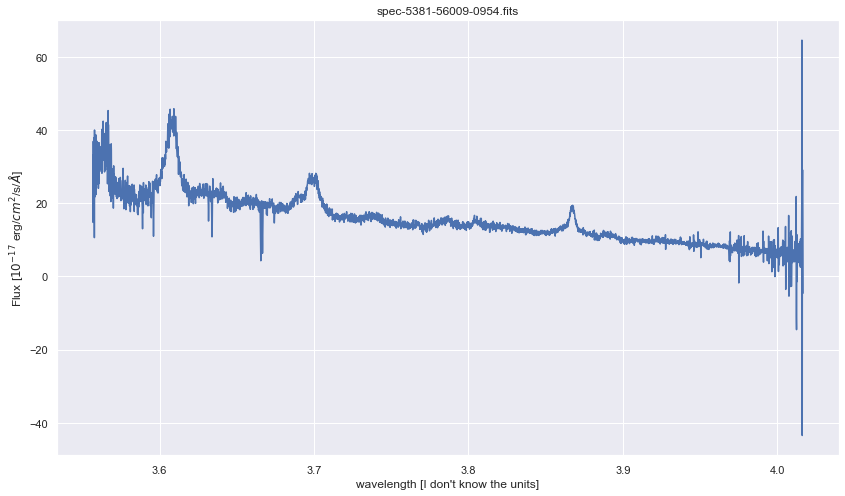

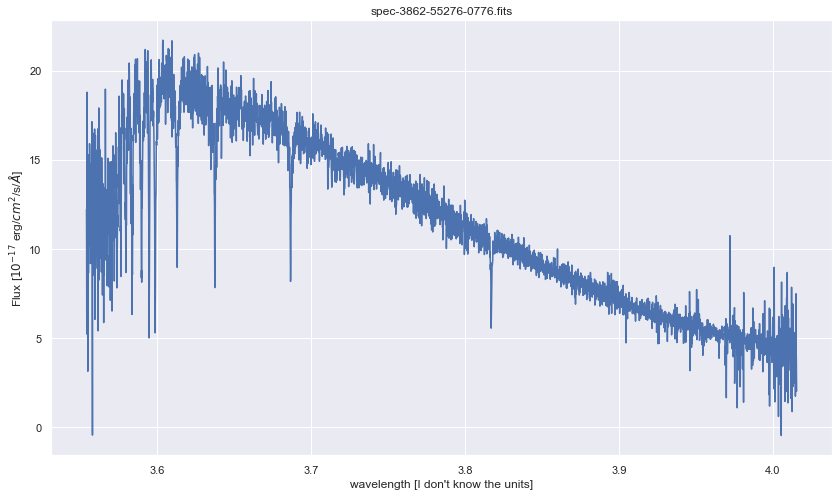

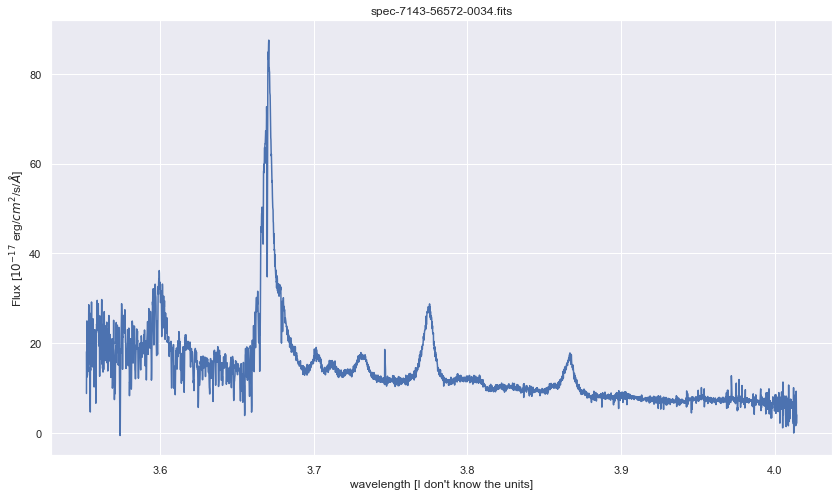

In [46]:
subplots(cut_stardata)